In [1]:
import pandas as pd

df = pd.read_csv("../data/OGNT_processed.csv")
df.head()

,Unnamed: 0,book,chapter,verse,word,lemma,trans,author
0,0,mt,1,1,Βιβλος,βίβλος,book,matthew
1,1,mt,1,1,γενεσεως,γένεσις,origin,matthew
2,2,mt,1,1,Ιησου,Ἰησοῦς,Jesus/Joshua,matthew
3,3,mt,1,1,Χριστου,Χριστός,Christ,matthew
4,4,mt,1,1,υιου,υἱός,son,matthew


# Authors

In [20]:
from cng_distance import compute_ngram_frequencies
import numpy as np

freqs = compute_ngram_frequencies(df, "author", n=3)
list(freqs["matthew"].items())[:4]

[('βίβλος γένεσις Ἰησοῦς', 5.4513737461840385e-05),
 ('γένεσις Ἰησοῦς Χριστός', 5.4513737461840385e-05),
 ('Ἰησοῦς Χριστός υἱός', 5.4513737461840385e-05),
 ('Χριστός υἱός Δαυείδ, Δαυίδ, Δαβίδ', 5.4513737461840385e-05)]

In [3]:
from cng_distance import calculate_distances

distances = calculate_distances(freqs)

print(distances)
unknow_author = {k: v for k, v in distances.items() if "unknown" in k}
print(unknow_author)
unknown_value = min(unknow_author.values())
unknown_value_author = {k: v for k, v in unknow_author.items() if v == unknown_value}
print(F"Unkown autor with min distance: {unknown_value} is {unknown_value_author}")


{('matthew', 'mark'): 503.5780732330826, ('matthew', 'luke'): 642.1033857556614, ('matthew', 'john'): 879.2251254771598, ('matthew', 'paul'): 1182.319070557914, ('matthew', 'unknown'): 1329.6319145330888, ('matthew', 'james'): 1508.5281419798775, ('matthew', 'peter'): 1510.0873504327856, ('matthew', 'jude'): 1589.5855830563166, ('mark', 'luke'): 653.0860610389499, ('mark', 'john'): 835.6009865829682, ('mark', 'paul'): 1244.7154776601083, ('mark', 'unknown'): 1339.173211708747, ('mark', 'james'): 1521.2014195868694, ('mark', 'peter'): 1526.8474249069131, ('mark', 'jude'): 1589.7071883806252, ('luke', 'john'): 773.8729935257462, ('luke', 'paul'): 940.2534571857055, ('luke', 'unknown'): 1207.7296283408123, ('luke', 'james'): 1476.8005481092605, ('luke', 'peter'): 1476.1264556914407, ('luke', 'jude'): 1582.9621056154367, ('john', 'paul'): 1010.1959841210396, ('john', 'unknown'): 1256.9770212973115, ('john', 'james'): 1483.7066313688013, ('john', 'peter'): 1481.0166951315675, ('john', 'jude

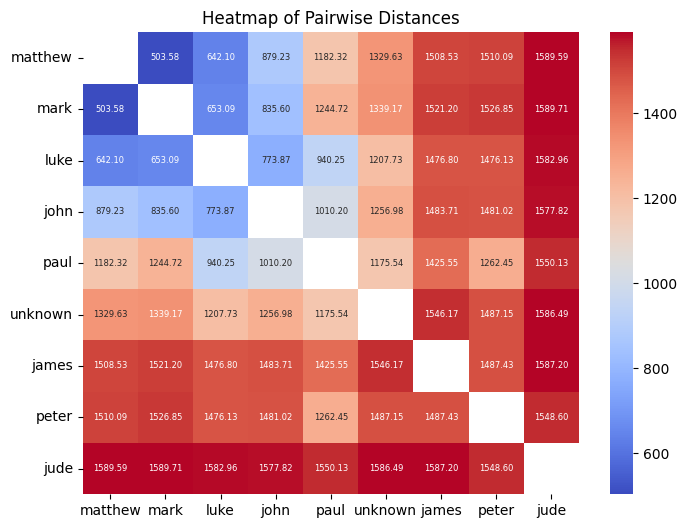

In [4]:
from visualise import show_distance_heatmap

show_distance_heatmap(distances, docs=list(freqs.keys()))

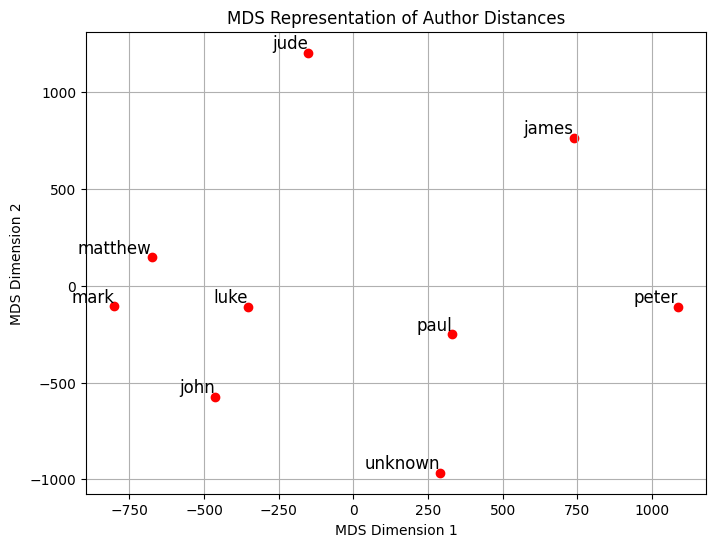

In [5]:
from visualise import show_author_mds_embedding

show_author_mds_embedding(distances, authors=list(freqs.keys()))

# Books

In [6]:
from cng_distance import compute_ngram_frequencies

freqs = compute_ngram_frequencies(df, "book", n=3)
# dict(sorted(freqs["john"].items(), key=lambda item: item[1], reverse=True))
freqs

{'mt': {'βίβλος γένεσις Ἰησοῦς': 5.4513737461840385e-05,
  'γένεσις Ἰησοῦς Χριστός': 5.4513737461840385e-05,
  'Ἰησοῦς Χριστός υἱός': 5.4513737461840385e-05,
  'Χριστός υἱός Δαυείδ, Δαυίδ, Δαβίδ': 5.4513737461840385e-05,
  'υἱός Δαυείδ, Δαυίδ, Δαβίδ υἱός': 5.4513737461840385e-05,
  'Δαυείδ, Δαυίδ, Δαβίδ υἱός Ἀβραάμ': 5.4513737461840385e-05,
  'υἱός Ἀβραάμ Ἀβραάμ': 5.4513737461840385e-05,
  'Ἀβραάμ Ἀβραάμ γεννάω': 5.4513737461840385e-05,
  'Ἀβραάμ γεννάω ὁ': 5.4513737461840385e-05,
  'γεννάω ὁ Ἰσαάκ': 5.4513737461840385e-05,
  'ὁ Ἰσαάκ Ἰσαάκ': 5.4513737461840385e-05,
  'Ἰσαάκ Ἰσαάκ δέ': 5.4513737461840385e-05,
  'Ἰσαάκ δέ γεννάω': 5.4513737461840385e-05,
  'δέ γεννάω ὁ': 0.002017008286088094,
  'γεννάω ὁ Ἰακώβ': 0.00010902747492368077,
  'ὁ Ἰακώβ Ἰακώβ': 0.00010902747492368077,
  'Ἰακώβ Ἰακώβ δέ': 0.00010902747492368077,
  'Ἰακώβ δέ γεννάω': 0.00010902747492368077,
  'γεννάω ὁ Ἰούδας': 5.4513737461840385e-05,
  'ὁ Ἰούδας καί': 5.4513737461840385e-05,
  'Ἰούδας καί ὁ': 0.0001090274749236

In [7]:
from cng_distance import calculate_distances

distances = calculate_distances(freqs)

print(distances)

{('mt', 'mk'): 503.5780732330826, ('mt', 'lk'): 550.8068306730501, ('mt', 'j'): 889.1512942241203, ('mt', 'acts'): 963.097653615132, ('mt', 'rom'): 1306.1328008700605, ('mt', '1kor'): 1367.6562028383466, ('mt', '2kor'): 1432.9115894143094, ('mt', 'gal'): 1521.6558631803357, ('mt', 'eph'): 1444.292019499379, ('mt', 'phi'): 1530.254226541333, ('mt', 'col'): 1478.937156858225, ('mt', '1tes'): 1519.7085441375027, ('mt', '2tes'): 1524.8046032985053, ('mt', '1tym'): 1578.0970574094058, ('mt', '2tym'): 1539.1682707819837, ('mt', 'tit'): 1595.076381290069, ('mt', 'fil'): 1586.3525763857724, ('mt', 'heb'): 1329.6319145330888, ('mt', 'jam'): 1508.5281419798775, ('mt', '1pet'): 1541.6284452244474, ('mt', '2pet'): 1568.5180314309328, ('mt', '1j'): 1424.7768631364825, ('mt', '2j'): 1569.3225849234384, ('mt', '3j'): 1598.72014126458, ('mt', 'jd'): 1589.5855830563166, ('mt', 'rev'): 1217.508742131808, ('mk', 'lk'): 601.5124294321532, ('mk', 'j'): 864.9248969755706, ('mk', 'acts'): 954.6205477097061, 

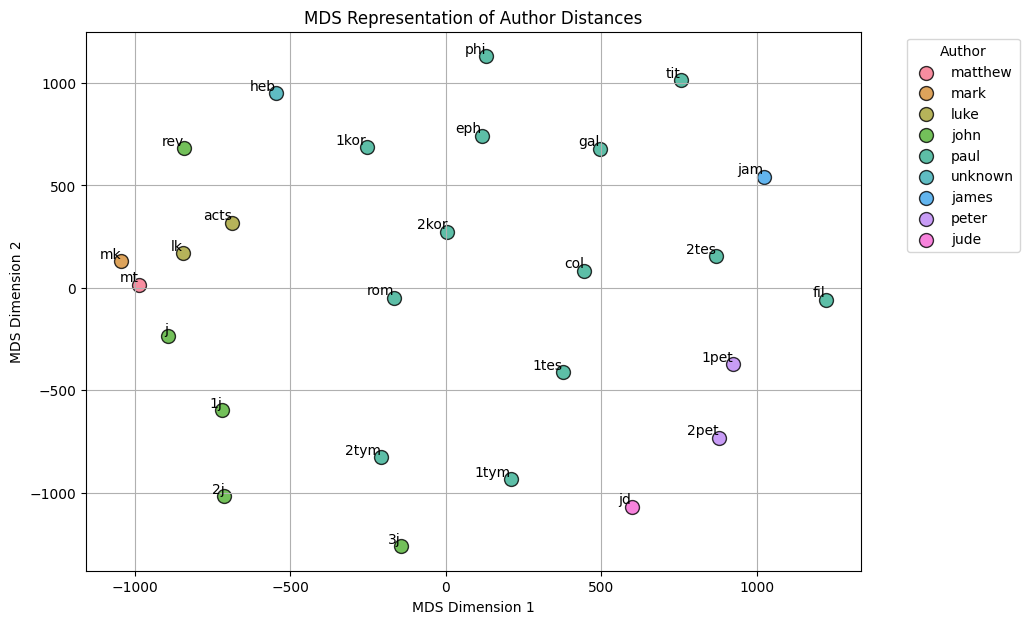

In [8]:
from visualise import show_book_mds_embedding

show_book_mds_embedding(distances)